In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load the dataset and display the first 10 rows.

In [ ]:
import pandas as pd

#load the dataset (dataset overview)
data = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")

#1. display the first 10 rows and columns
print("First 10 rows and columns")
print(data.head(10))

First 10 rows and columns
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3             

2. Identify the number of rows and columns in the dataset.

In [ ]:
#2. identify the number of rows and columns
rows, columns = data.shape
print("Number of rows:", rows)
print("Number od columns:", columns)

Number of rows: 143
Number od columns: 9


3. List all the columns and their data types.

In [ ]:
#3. List the columns and their data types
print("Columns and their data types")
print(data.dtypes)

Columns and their data types
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
#basic statistics 1. calculate mean, median and standard deviation for the score column
mean_score = data['score'].mean()
median_score = data['score'].median()
standard_deviation = data['score'].std()

print("Mean score is:", mean_score)
print("Median score is:", median_score)
print("Standard deviation is:", standard_deviation)

Mean score is: 5.52758041958042
Median score is: 5.785
Standard deviation is: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
#2. country with highest and lowest happiness scores
highest_score = data.loc[data['score'].idxmax()]
lowest_score = data.loc[data['score'].idxmin()]

print("Country with the highest happiness score is:")
print("Country:", highest_score['Country name'], "Score:", highest_score['score'])

print("\nCountry with the lowest happiness score is:")
print("Country:", lowest_score['Country name'], "Score:", lowest_score['score'])


Country with the highest happiness score is:
Country: Finland Score: 7.741

Country with the lowest happiness score is:
Country: Afghanistan Score: 1.721


1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
#check if there are any missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


1. Filter the dataset to show only the countries with a Score greater than 7.5.

In [ ]:
# Filter the dataset for countries with a Score greater than 7.5
high_score_countries = data[data['score'] > 7.5]

print("Countries with a Score greater than 7.5:")
print(high_score_countries)

Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [ ]:
# Sort the filtered dataset by GDP per Capita in descending order
sorted_data = high_score_countries.sort_values(by='Log GDP per capita', ascending=False)
print("Top 10 countries by GDP per Capita (Score > 7.5):")
print(sorted_data.head(10))

Top 10 countries by GDP per Capita (Score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
import numpy as np

#for categorizing happiness
conditions = [
    (data['score'] < 4),                      # Low
    (data['score'] >= 4) & (data['score'] <= 6),  # Medium
    (data['score'] > 6)                       # High
]

categories = ['Low', 'Medium', 'High']
data['Happiness Category'] = np.select(conditions, categories)
print("Updated dataset with Happiness Category:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))

Updated dataset with Happiness Category:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Bar plot:  Plot the top 10 happiest countries by Score using a bar chart.

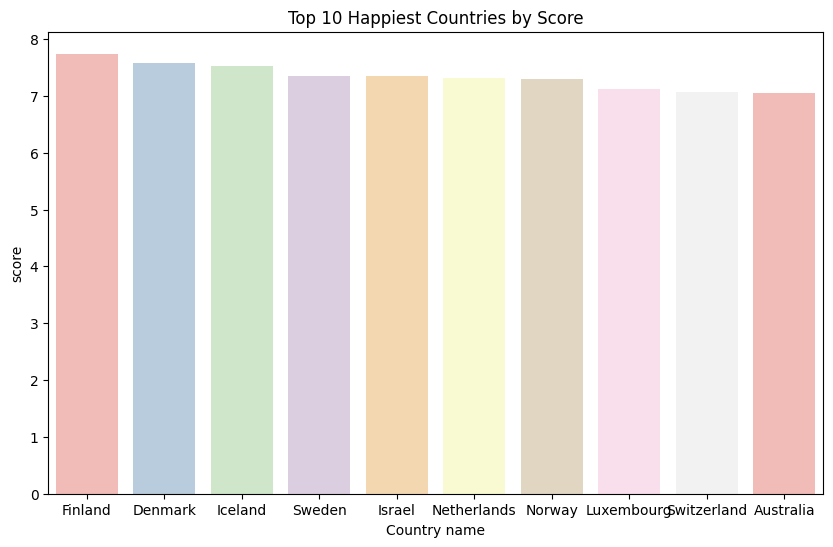

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and filter the top 10 happiest countries
top_10_happiest = data.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='Pastel1', hue='Country name', legend=False)
plt.title('Top 10 Happiest Countries by Score')
plt.show()

 Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

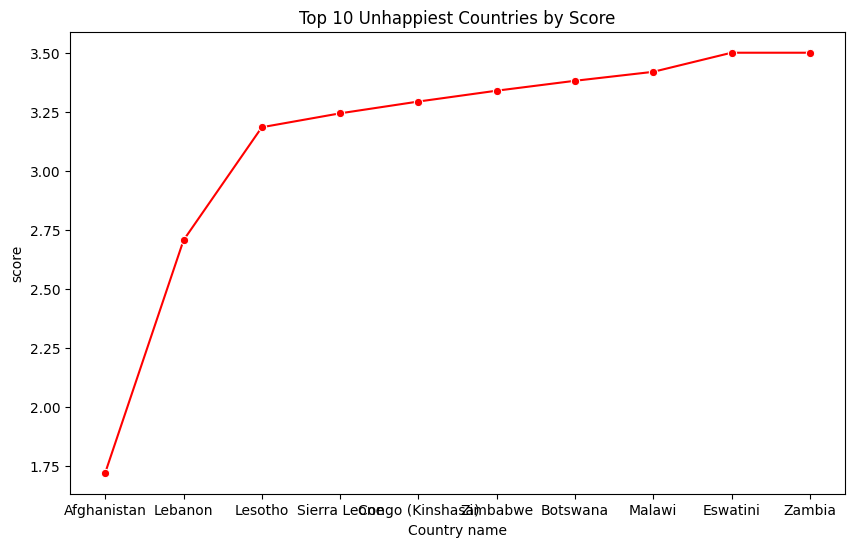

In [ ]:
# Sort and filter the top 10 unhappiest countries
top_10_unhappiest = data.sort_values(by='score').head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.show()

Plot a histogram for the Score column to show its distribution and also interpret.

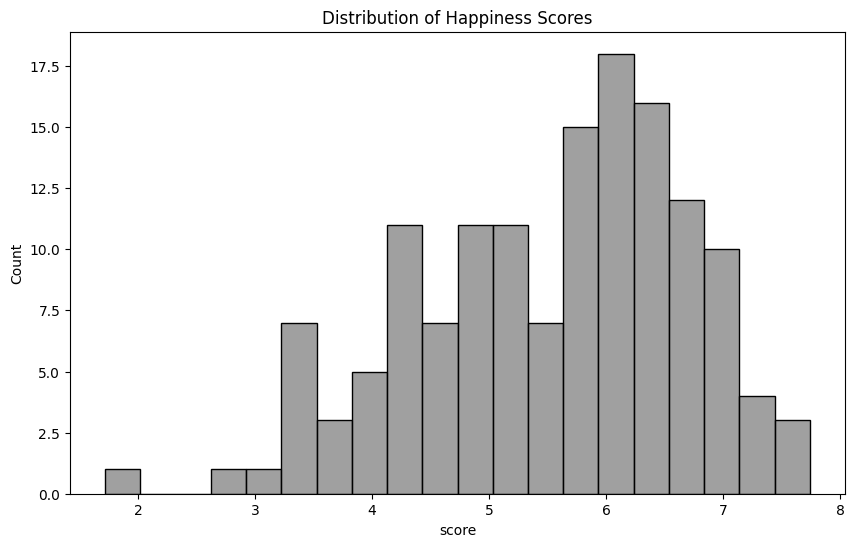

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, color='grey')
plt.title('Distribution of Happiness Scores')
plt.show()

Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

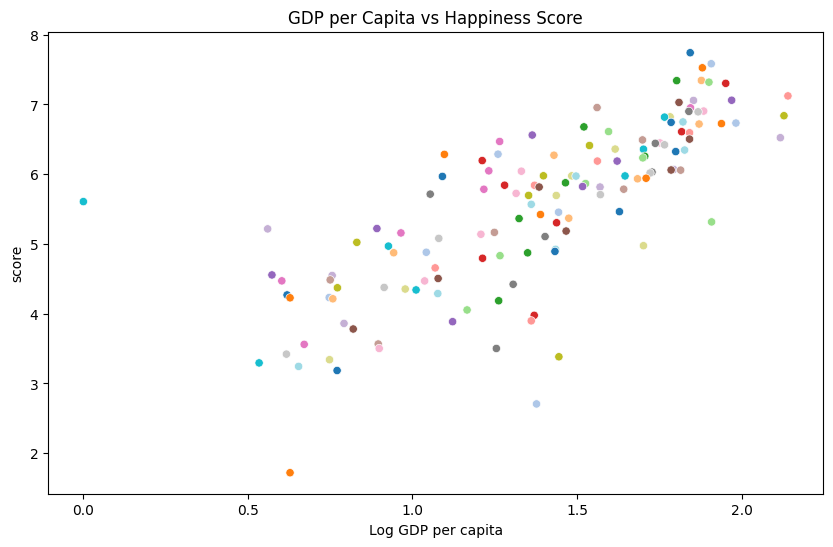

In [ ]:
# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, hue='Country name', palette='tab20', legend=False)
plt.title('GDP per Capita vs Happiness Score')
plt.show()

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
# Define the countries in South Asia
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
print("South Asian Countries:")
print(south_asian_countries)

South Asian Countries:
['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']


2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

#Display the filtered dataset
print("Filtered Dataset for South Asian Countries:")
print(south_asia_data)

Filtered Dataset for South Asian Countries:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091

3.  Save the filtered dataframe as separate CSV files for future use.

In [ ]:
#Save the filtered dataset as a CSV file
output_path = "/content/drive/MyDrive/South_Asia_Dataset.csv"
south_asia_data.to_csv(output_path, index=False)
print(f"Filtered dataset saved to: {output_path}")

Filtered dataset saved to: /content/drive/MyDrive/South_Asia_Dataset.csv


1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy

In [ ]:
south_asia_data = south_asia_data.assign(
    Composite_Score=(
        0.40 * south_asia_data['Log GDP per capita'] +
        0.30 * south_asia_data['Social support'] +
        0.30 * south_asia_data['Healthy life expectancy']
    )
)

print("South Asia DataFrame with Composite Score:")
print(south_asia_data[['Country name', 'Composite_Score']])

South Asia DataFrame with Composite Score:
    Country name  Composite_Score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238


2. Rank the South Asian countries based on the Composite Score in descending order.


In [ ]:
#Rank the countries based on the Composite Score
south_asia_data = south_asia_data.sort_values(by='Composite_Score', ascending=False)

print("South Asian Countries Ranked by Composite_Score:")
print(south_asia_data[['Country name', 'Composite_Score']])

South Asian Countries Ranked by Composite_Score:
    Country name  Composite_Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

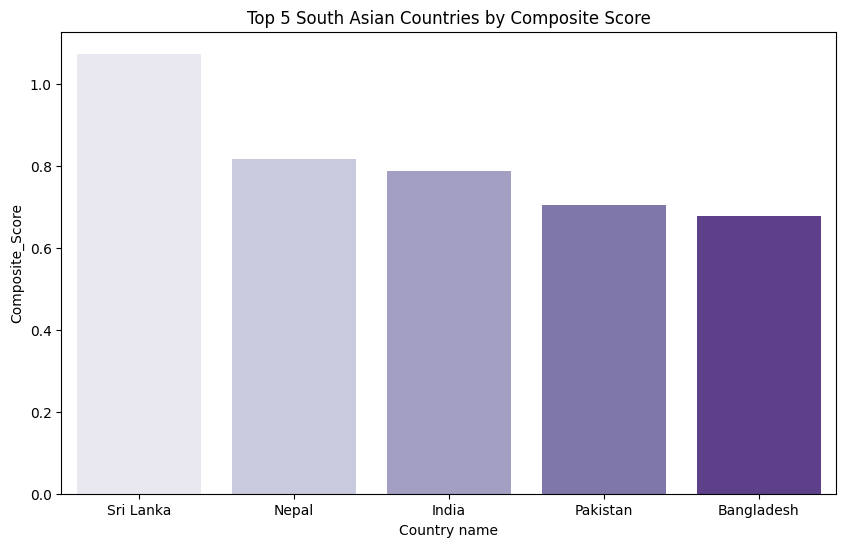

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 5 countries
top_5 = south_asia_data.head(5)

# Create a horizontal bar chart with different colors using Seaborn's palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='Composite_Score', data=top_5, hue='Country name', palette='Purples', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.show()

4.  Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.


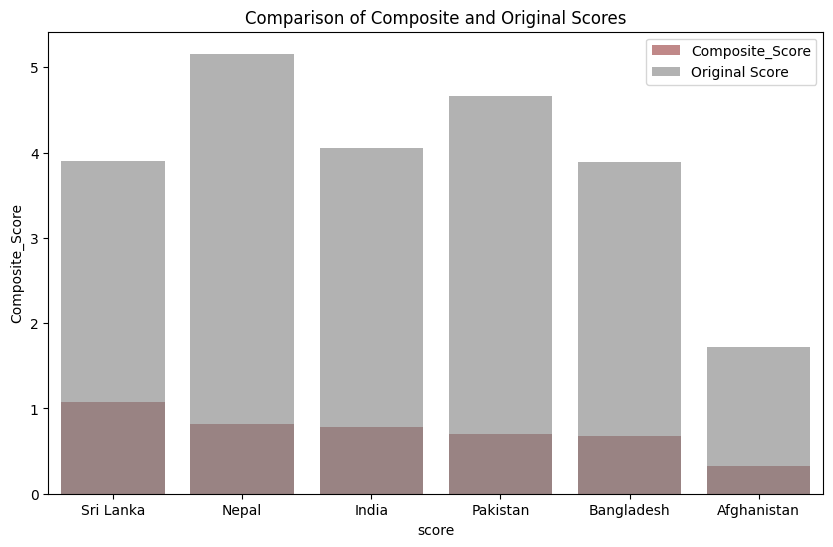

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a comparison plot for Composite Score and Original Score
plt.figure(figsize=(10, 6))

# Plot both Composite Score and Original Score side by side
sns.barplot(y='Composite_Score', x='Country name', data=south_asia_data, color='brown', label='Composite_Score', alpha=0.6)
sns.barplot(y='score', x='Country name', data=south_asia_data, color='grey', label='Original Score', alpha=0.6)

plt.xlabel('score')
plt.title('Comparison of Composite and Original Scores')
plt.legend()
plt.show()


1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
# Calculate IQR and define outlier bounds
Q1_score, Q3_score = south_asia_data['score'].quantile([0.25, 0.75])
Q1_gdp, Q3_gdp = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_score, IQR_gdp = Q3_score - Q1_score, Q3_gdp - Q1_gdp

# Identify outliers
outliers = south_asia_data[
    (south_asia_data['score'] < Q1_score - 1.5 * IQR_score) |
    (south_asia_data['score'] > Q3_score + 1.5 * IQR_score) |
    (south_asia_data['Log GDP per capita'] < Q1_gdp - 1.5 * IQR_gdp) |
    (south_asia_data['Log GDP per capita'] > Q3_gdp + 1.5 * IQR_gdp)
]

outliers[['Country name', 'score', 'Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


2. Define outliers using the 1.5 × IQR rule.


In [ ]:
# Calculate Quartiles and IQR
Q1_score, Q3_score = south_asia_data['score'].quantile([0.25, 0.75])
IQR_score = Q3_score - Q1_score

Q1_gdp, Q3_gdp = south_asia_data['Log GDP per capita'].quantile([0.25, 0.75])
IQR_gdp = Q3_gdp - Q1_gdp

# Define outlier bounds
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

print(f"Lower Bound: {lower_bound_score}, Upper Bound: {upper_bound_score}")
print(f"Lower Bound: {lower_bound_gdp}, Upper Bound: {upper_bound_gdp}")

Lower Bound: 2.963125000000001, Upper Bound: 5.432124999999999
Lower Bound: 0.7449999999999999, Upper Bound: 1.401


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

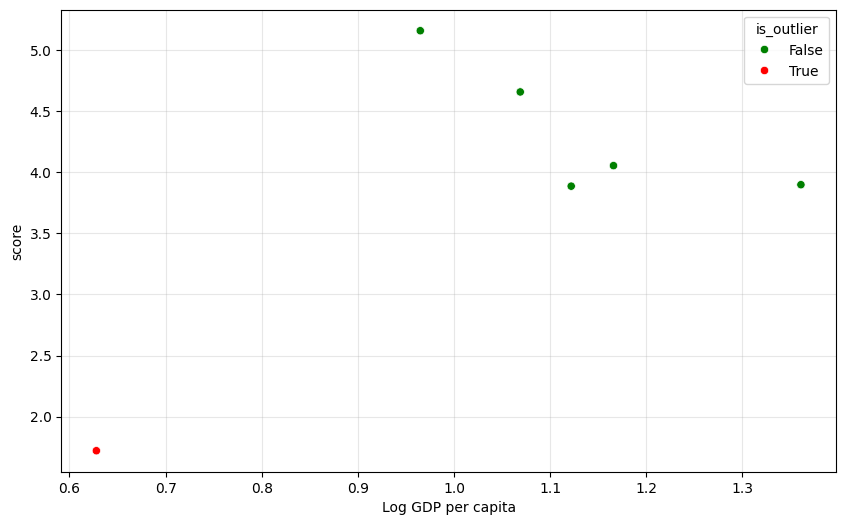

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mark outliers based on the bounds
south_asia_data['is_outlier'] = (
    (south_asia_data['score'] < lower_bound_score) |
    (south_asia_data['score'] > upper_bound_score) |
    (south_asia_data['Log GDP per capita'] < lower_bound_gdp) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp)
)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score',
    data=south_asia_data,
    hue='is_outlier', palette={False: 'green', True: 'red'}
)
plt.grid(alpha=0.3)
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.
- Outliers in South Asia, based on happiness score and GDP per capita, show countries with high or low values. These outliers could point to either successful countries or those facing serious issues. They can affect regional averages, so it's important to consider them carefully to avoid the misunderstanding. Understanding outliers helps make better and more accurate.

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
# Calculate Pearson correlation
correlation_freedom = south_asia_data['Freedom to make life choices'].corr(south_asia_data['score'])
correlation_generosity = south_asia_data['Generosity'].corr(south_asia_data['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Pearson correlation between Generosity and Score: {correlation_generosity}")

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson correlation between Generosity and Score: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

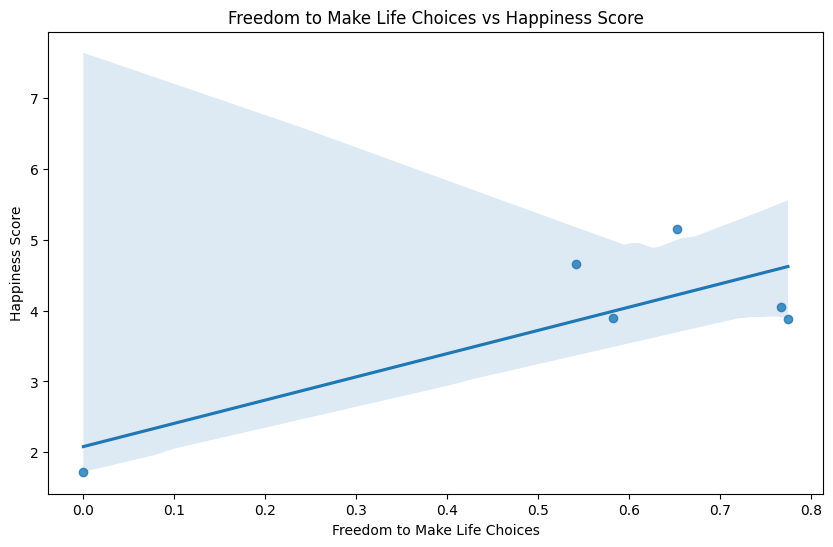

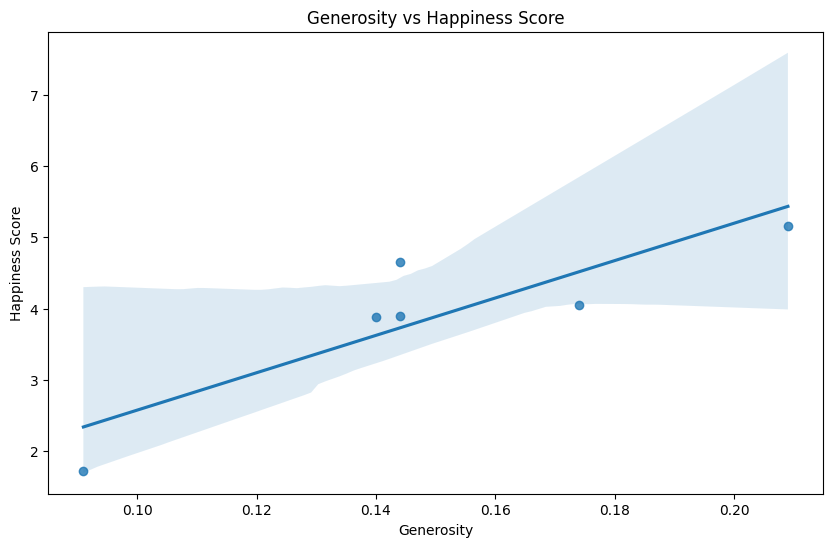

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with trendline for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_data)
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_data)
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

3.  Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.
- The strongest relationship is the one with the highest correlation to the Score, while the weakest has a correlation closer to zero. For example, if Freedom to Make Life Choices has a higher correlation than Generosity, it suggests freedom is more impactful on happiness.

In [ ]:
# Discuss the strongest and weakest relationships based on correlation
if abs(correlation_freedom) > abs(correlation_generosity):
    print("The strongest relationship is between 'Freedom to Make Life Choices' and 'Score'.")
    print(f"Pearson Correlation: {correlation_freedom}")
    print("The scatter plot indicates a more pronounced trend with a stronger correlation.")
else:
    print("The strongest relationship is between 'Generosity' and 'Score'.")
    print(f"Pearson Correlation: {correlation_generosity}")
    print("The scatter plot indicates a more pronounced trend with a stronger correlation.")

# The weaker relationship would be the one with the smaller absolute correlation value.
if abs(correlation_freedom) < abs(correlation_generosity):
    print("The weakest relationship is between 'Freedom to Make Life Choices' and 'Score'.")
    print(f"Pearson Correlation: {correlation_freedom}")
else:
    print("The weakest relationship is between 'Generosity' and 'Score'.")
    print(f"Pearson Correlation: {correlation_generosity}")

The strongest relationship is between 'Generosity' and 'Score'.
Pearson Correlation: 0.874512371253192
The scatter plot indicates a more pronounced trend with a stronger correlation.
The weakest relationship is between 'Freedom to Make Life Choices' and 'Score'.
Pearson Correlation: 0.8005185224163315


1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
# Add GDP-Score Gap column
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']
print(south_asia_data[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head())

    Country name  Log GDP per capita  score  GDP-Score Gap
127    Sri Lanka               1.361  3.898         -2.537
92         Nepal               0.965  5.158         -4.193
125        India               1.166  4.054         -2.888
107     Pakistan               1.069  4.657         -3.588
128   Bangladesh               1.122  3.886         -2.764


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# Rank by GDP-Score Gap in ascending order
ranked_ascending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=True)
print("Ranking by GDP-Score Gap by ascending:")
print(ranked_ascending[['Country name', 'GDP-Score Gap']])

# Rank by GDP-Score Gap in descending order
ranked_descending = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)
print("Ranking by GDP-Score Gap by descending:")
print(ranked_descending[['Country name', 'GDP-Score Gap']])

Ranking by GDP-Score Gap by ascending:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093
Ranking by GDP-Score Gap by descending:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.


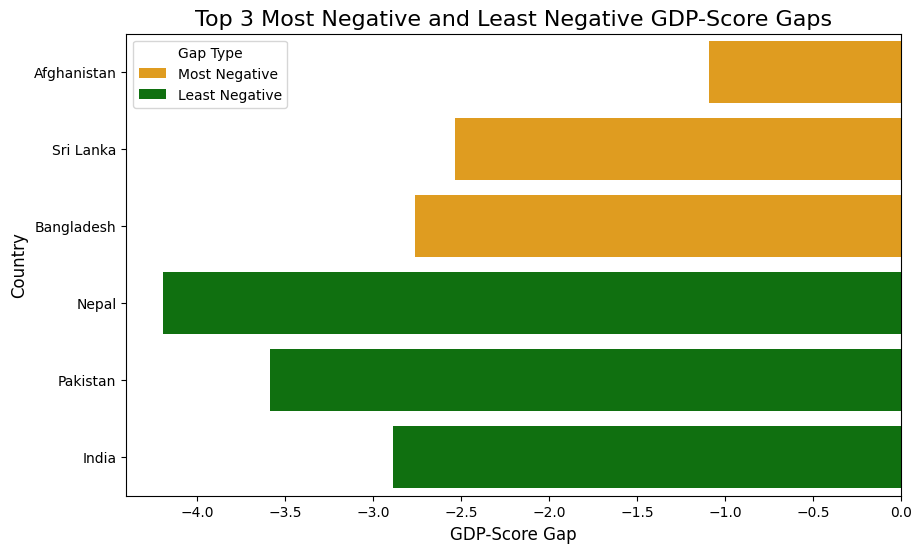

In [ ]:
# Get the 3 most negative and 3 least negative values
most_negative_gap = ranked_descending.head(3)
least_negative_gap = ranked_ascending.head(3)

# Combine both groups for visualization
top_gaps = pd.concat([most_negative_gap, least_negative_gap])

# Create a new column to categorize the gaps as 'Most Negative' and 'Least Negative'
top_gaps['Gap Type'] = top_gaps['GDP-Score Gap'].apply(lambda x: 'Most Negative' if x in most_negative_gap['GDP-Score Gap'].values else 'Least Negative')

# Plot a bar chart highlighting the top 3 most negative and least negative GDP-Score gaps
plt.figure(figsize=(10,6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gaps, hue='Gap Type', palette={'Most Negative': 'orange', 'Least Negative': 'green'})

plt.title('Top 3 Most Negative and Least Negative GDP-Score Gaps', fontsize=16)
plt.xlabel('GDP-Score Gap', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.
- Countries with a positive GDP-Score gap may have high economic output but lower happiness, suggesting a need for policies improving well-being. Similarly, a negative gap indicates that non-economic factors like social support may contribute more to happiness than wealth alone.

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

In [ ]:
# List of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
print(middle_east_data[['Country name', 'score']])

             Country name  score
4                  Israel  7.341
12                 Kuwait  6.951
21   United Arab Emirates  6.733
27           Saudi Arabia  6.594
61                Bahrain  5.959
91                   Iraq  5.166
99                   Iran  4.923
124                Jordan  4.186
132                 Yemen  3.561
141               Lebanon  2.707


2. • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.


In [ ]:
# Calculate the mean and standard deviation for the score in South Asia
mean_south_asia = south_asia_data['score'].mean()
std_south_asia = south_asia_data['score'].std()

# Calculate the mean and standard deviation for the score in the Middle East
mean_middle_east = middle_east_data['score'].mean()
std_middle_east = middle_east_data['score'].std()

print(f"South Asia - Mean: {mean_south_asia}, Standard Deviation: {std_south_asia}")
print(f"Middle East - Mean: {mean_middle_east}, Standard Deviation: {std_middle_east}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


1. Which region has higher happiness Scores on average?

In [ ]:
if mean_south_asia > mean_middle_east:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

Middle East has a higher average happiness score.


2.  Identify the top 3 and bottom 3 countries in each region based on the score.


In [ ]:
# Top 3 and Bottom 3 countries for both regions
top_3_south_asia = south_asia_data[['Country name', 'score']].nlargest(3, 'score')
bottom_3_south_asia = south_asia_data[['Country name', 'score']].nsmallest(3, 'score')

top_3_middle_east = middle_east_data[['Country name', 'score']].nlargest(3, 'score')
bottom_3_middle_east = middle_east_data[['Country name', 'score']].nsmallest(3, 'score')

# Print the results
print("South Asia - Top 3:", top_3_south_asia)
print("South Asia - Bottom 3:", bottom_3_south_asia)
print("Middle East - Top 3:", top_3_middle_east)
print("Middle East - Bottom 3:", bottom_3_middle_east)

South Asia - Top 3:     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
South Asia - Bottom 3:     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898
Middle East - Top 3:             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733
Middle East - Bottom 3:     Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


2. Plot bar charts comparing these charts

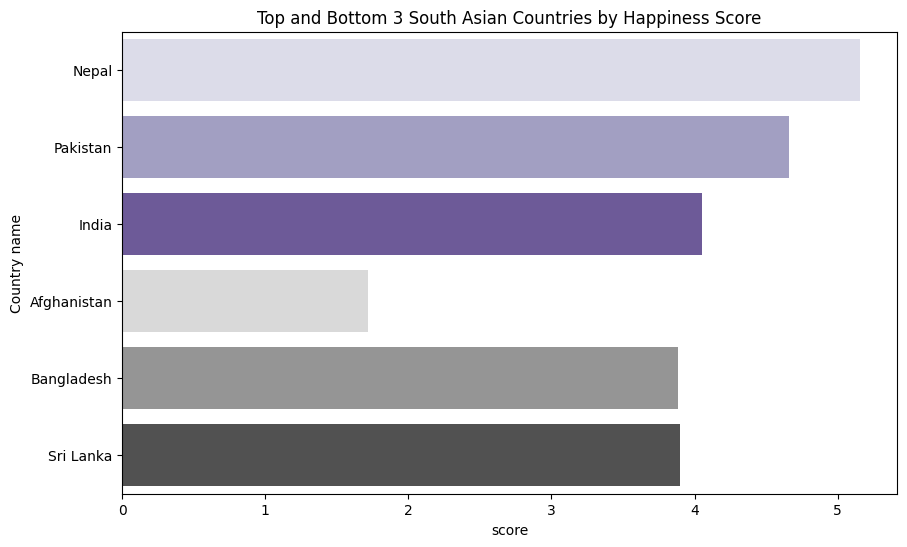

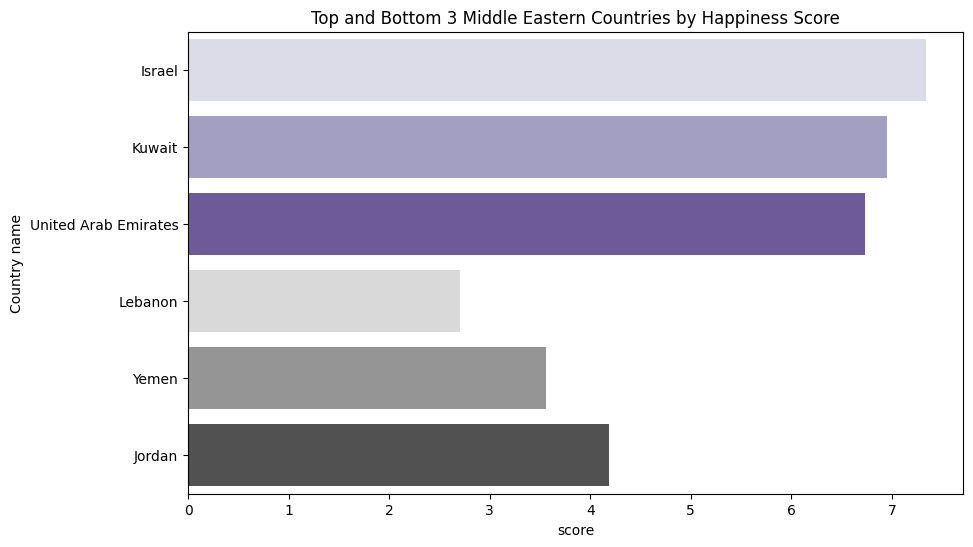

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for South Asia
plt.figure(figsize=(10, 6))
sns.barplot(y='Country name', x='score', data=top_3_south_asia, hue='Country name', palette='Purples', legend=False)
sns.barplot(y='Country name', x='score', data=bottom_3_south_asia, hue='Country name', palette='Greys', legend=False)
plt.title('Top and Bottom 3 South Asian Countries by Happiness Score')
plt.show()

# Plot for Middle East
plt.figure(figsize=(10, 6))
sns.barplot(y='Country name', x='score', data=top_3_middle_east, hue='Country name', palette='Purples', legend=False)
sns.barplot(y='Country name', x='score', data=bottom_3_middle_east, hue='Country name', palette='Greys', legend=False)
plt.title('Top and Bottom 3 Middle Eastern Countries by Happiness Score')
plt.show()

3.  Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.


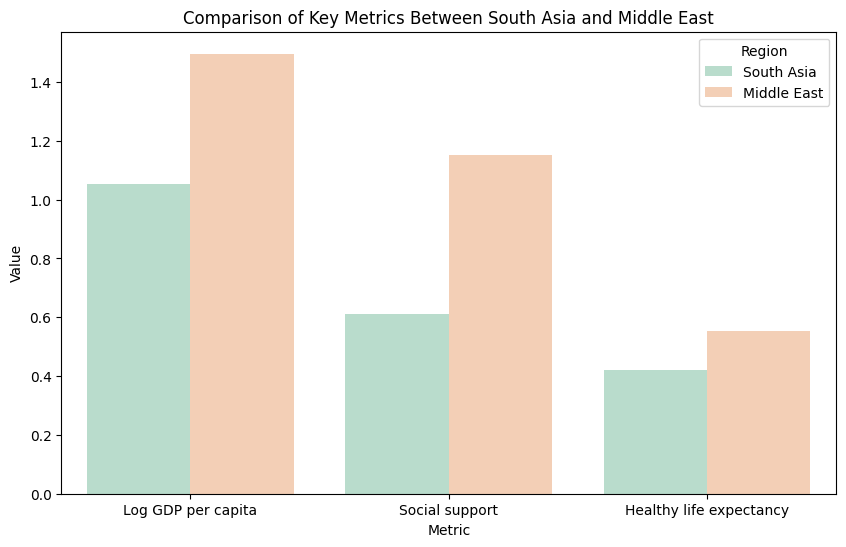

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_metrics = south_asia_data[metrics].mean()
middle_east_metrics = middle_east_data[metrics].mean()

#comparison
comparison_data = pd.DataFrame({
    'Metric': metrics * 2,
    'Region': ['South Asia'] * len(metrics) + ['Middle East'] * len(metrics),
    'Value': list(south_asia_metrics) + list(middle_east_metrics)
})

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_data, palette='Pastel2')
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.show()

3. Which metrics show the largest disparity between the two regions?

In [ ]:
disparity = south_asia_metrics - middle_east_metrics
disparity_data = pd.DataFrame({
    'Metric': metrics,
    'Disparity': disparity
})
# Sort the disparity values in descending order to find the largest disparities
disparity_data = disparity_data.sort_values(by='Disparity', ascending=False)
print(disparity_data)

                                          Metric  Disparity
Healthy life expectancy  Healthy life expectancy  -0.133778
Log GDP per capita            Log GDP per capita  -0.444500
Social support                    Social support  -0.540944


4. Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
# Calculate the range for Score in both regions
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

# Calculate the coefficient of variation for Score in both regions
south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print(f"South Asia - Range: {south_asia_range}, CV: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, CV: {middle_east_cv}")

South Asia - Range: 3.4370000000000003, CV: 0.30214828833374263
Middle East - Range: 4.634, CV: 0.28938880812119405


4. Which region has greater variability in happiness?

In [ ]:
# Compare CV values
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

South Asia has greater variability in happiness.


5. Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.


In [ ]:
# Calculate the Pearson correlation for Score with Freedom and Generosity for both regions
south_asia_corr = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr().iloc[0, 1:3]
middle_east_corr = middle_east_data[['score', 'Freedom to make life choices', 'Generosity']].corr().iloc[0, 1:3]

print("South Asia correlations:")
print(south_asia_corr)

print("\nMiddle East correlations:")
print(middle_east_corr)

South Asia correlations:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East correlations:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


5. Create scatter plots to visualize and interpret the relationships.


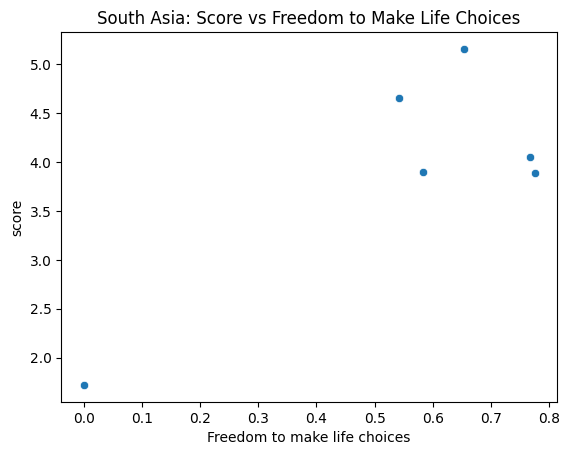

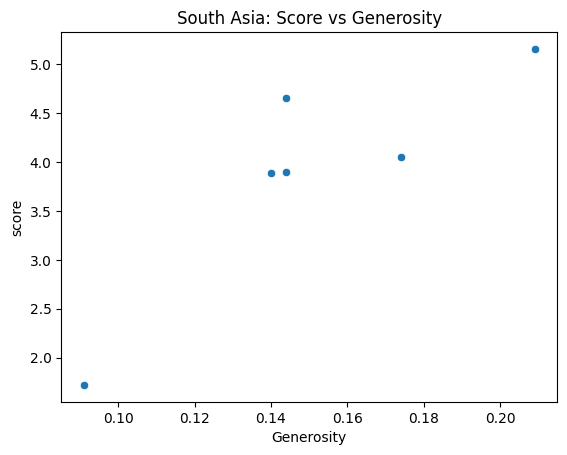

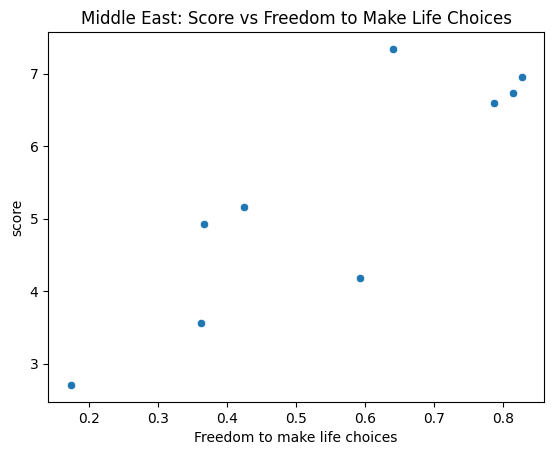

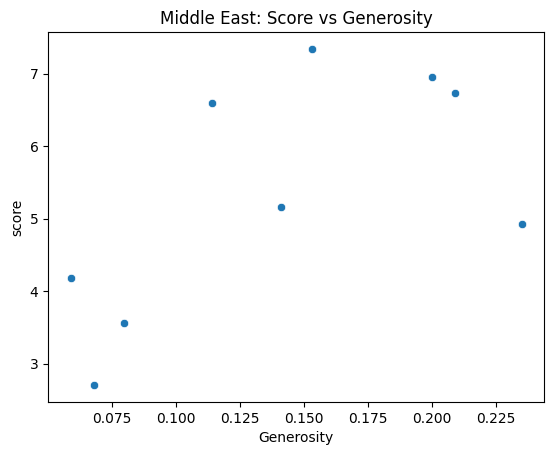

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for South Asia
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_data)
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.show()

sns.scatterplot(x='Generosity', y='score', data=south_asia_data)
plt.title('South Asia: Score vs Generosity')
plt.show()

# Scatter plot for Middle East
sns.scatterplot(x='Freedom to make life choices', y='score', data=middle_east_data)
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.show()

sns.scatterplot(x='Generosity', y='score', data=middle_east_data)
plt.title('Middle East: Score vs Generosity')
plt.show()

6. Identify outlier countries in both regions based on Score and GDP per Capita.


In [ ]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for South Asia - Score and GDP per Capita
south_asia_outliers_score, south_asia_lower_score, south_asia_upper_score = detect_outliers(south_asia_data, 'score')
south_asia_outliers_gdp, south_asia_lower_gdp, south_asia_upper_gdp = detect_outliers(south_asia_data, 'Log GDP per capita')

# Detect outliers for the Middle East - Score and GDP per Capita
middle_east_outliers_score, middle_east_lower_score, middle_east_upper_score = detect_outliers(middle_east_data, 'score')
middle_east_outliers_gdp, middle_east_lower_gdp, middle_east_upper_gdp = detect_outliers(middle_east_data, 'Log GDP per capita')

# Display outliers
print("South Asia - Outliers based on Score:")
print(south_asia_outliers_score[['Country name', 'score']])

print("\nSouth Asia - Outliers based on GDP per Capita:")
print(south_asia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East - Outliers based on Score:")
print(middle_east_outliers_score[['Country name', 'score']])

print("\nMiddle East - Outliers based on GDP per Capita:")
print(middle_east_outliers_gdp[['Country name', 'Log GDP per capita']])

South Asia - Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

South Asia - Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East - Outliers based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East - Outliers based on GDP per Capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


6.  Plot these outliers and discuss their implications.

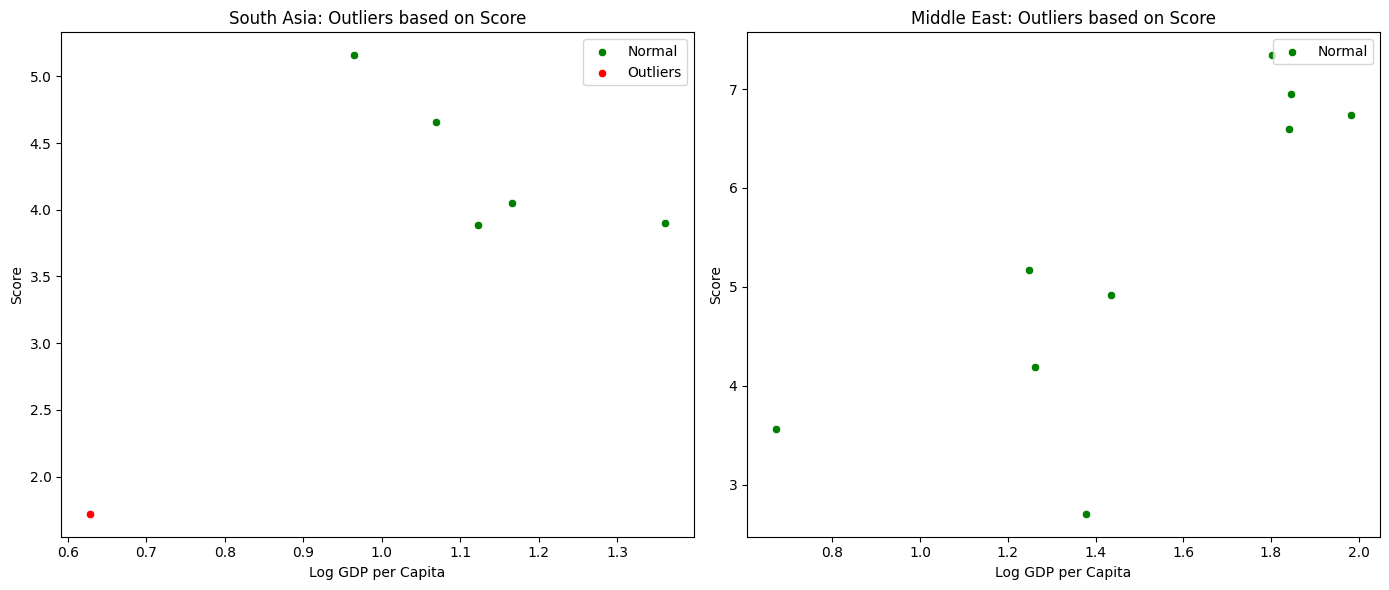

In [ ]:
plt.figure(figsize=(14, 6))

# South Asia - Score vs GDP per Capita
plt.subplot(1, 2, 1)
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Normal', color='green')
sns.scatterplot(x=south_asia_outliers_score['Log GDP per capita'], y=south_asia_outliers_score['score'], color='red', label='Outliers')
plt.title('South Asia: Outliers based on Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')

# Middle East - Score vs GDP per Capita
plt.subplot(1, 2, 2)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, label='Normal', color='green')
sns.scatterplot(x=middle_east_outliers_score['Log GDP per capita'], y=middle_east_outliers_score['score'], color='red', label='Outliers')
plt.title('Middle East: Outliers based on Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

Outliers in both regions may indicate countries with unique economic or social conditions that deviate significantly from regional trends, potentially affecting regional averages and policy focus.








7. Create boxplots comparing the distribution of Score between South Asia and the Middle East.


<ipython-input-97-babe33c83413>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data.loc[:, 'Region'] = 'Middle East'


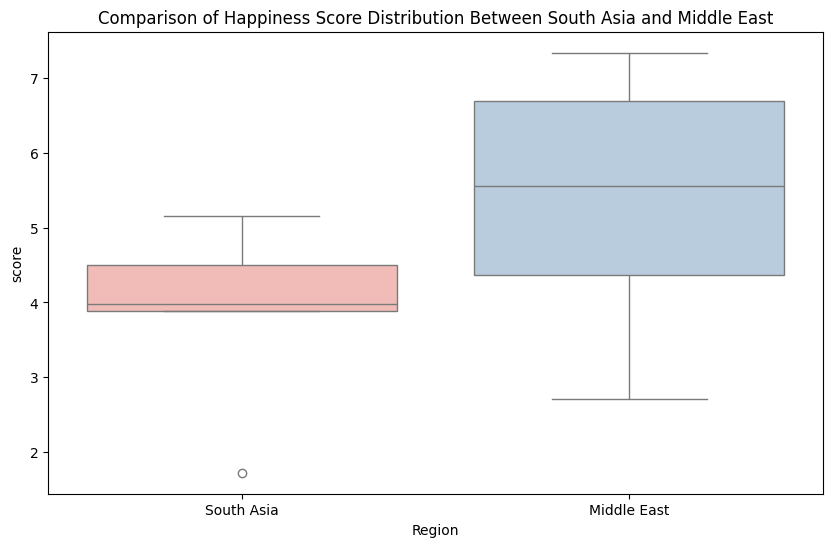

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asia_data.loc[:, 'Region'] = 'South Asia'
middle_east_data.loc[:, 'Region'] = 'Middle East'

# Combine both datasets
combined_data = pd.concat([south_asia_data[['score', 'Region']], middle_east_data[['score', 'Region']]])

# Create boxplot with the correct hue setting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_data, palette='Pastel1', hue='Region')
plt.title('Comparison of Happiness Score Distribution Between South Asia and Middle East')
plt.show()

7. Interpret the key differences in distribution shapes, medians, and outliers
- South Asia: Wider spread, more variability, and more outliers.
- Middle East: Narrower distribution, higher median, fewer extreme outliers.







In [ ]:
# Check basic statistics for both regions to compare medians, range, and outliers
south_asia_stats = south_asia_data['score'].describe()
middle_east_stats = middle_east_data['score'].describe()

print("South Asia Statistics:", south_asia_stats)
print("\nMiddle East Statistics:", middle_east_stats)

South Asia Statistics: count    6.000000
mean     3.895667
std      1.177069
min      1.721000
25%      3.889000
50%      3.976000
75%      4.506250
max      5.158000
Name: score, dtype: float64

Middle East Statistics: count    10.000000
mean      5.412100
std       1.566201
min       2.707000
25%       4.370250
50%       5.562500
75%       6.698250
max       7.341000
Name: score, dtype: float64
